<a href="https://colab.research.google.com/github/tasheera/CVD_Risk_Analyser/blob/MachineLearning/Copy_of_CardioVascularDieseaseRiskAssesssmentModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cardiovascular disease risk assessment**

# **Load dataset**

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

df = pd.read_csv('health_data.csv', index_col = 'id')

df


,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,1,168,62.0,110,80,0,0,0,0,1,0
1,20228,0,156,85.0,140,90,2,0,0,0,1,1
2,18857,0,165,64.0,130,70,2,0,0,0,0,1
3,17623,1,169,82.0,150,100,0,0,0,0,1,1
4,17474,0,156,56.0,100,60,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,1,168,76.0,120,80,0,0,1,0,1,0
99995,22601,0,158,126.0,140,90,1,1,0,0,1,1
99996,19066,1,183,105.0,180,90,2,0,0,1,0,1


**Initial graph to visualise data distibution**

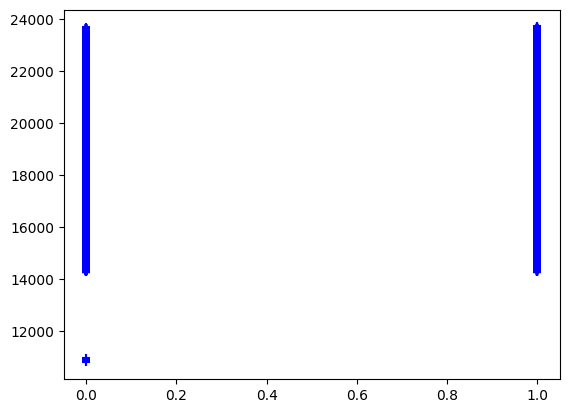

In [ ]:
plt.scatter(df.cardio, df.age, marker='+', color= 'blue')

# **Data preperation**

## Data seperation as X and Y

In [ ]:
x = df[['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']]
x

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
0,18393,1,168,62.0,110,80,0,0,0,0,1
1,20228,0,156,85.0,140,90,2,0,0,0,1
2,18857,0,165,64.0,130,70,2,0,0,0,0
3,17623,1,169,82.0,150,100,0,0,0,0,1
4,17474,0,156,56.0,100,60,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
99993,19240,1,168,76.0,120,80,0,0,1,0,1
99995,22601,0,158,126.0,140,90,1,1,0,0,1
99996,19066,1,183,105.0,180,90,2,0,0,1,0


In [ ]:
y = df['cardio']
y

id
0        0
1        1
2        1
3        1
4        0
        ..
99993    0
99995    1
99996    1
99998    1
99999    0
Name: cardio, Length: 70000, dtype: int64

## Data splitting into testing and training

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=100)

In [ ]:
x_train

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
46315,21824,0,155,75.0,130,90,0,0,0,0,1
83871,19704,0,156,59.0,150,1100,0,0,0,0,1
82755,17674,1,169,66.0,110,70,0,0,1,0,1
8469,19428,0,168,79.0,130,80,0,0,0,0,1
39180,21926,0,163,63.0,120,80,2,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
20362,22214,1,170,68.0,130,80,0,0,0,0,1
90493,22417,1,170,70.0,120,80,1,0,1,1,1
93652,19457,0,165,65.0,120,79,0,0,0,0,0


In [ ]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
83255,18961,1,176,85.0,140,90,0,0,0,0,1
9154,20423,0,165,65.0,120,80,0,0,0,0,1
33347,16657,1,178,76.0,110,80,1,0,0,0,1
22225,18053,0,170,110.0,120,80,0,0,0,1,1
96185,23144,1,176,65.0,120,80,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71296,22696,0,155,61.0,140,80,0,0,0,0,1
71523,19446,1,172,71.0,110,80,1,1,0,1,1
37905,22651,0,161,62.0,150,90,0,0,0,0,1


# **Model building**

## **Linear regression**

**Training the model**

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

**Applying model for predicting**

In [ ]:
y_lr_train_prediction = lr.predict(x_train)
y_lr_test_prediction = lr.predict(x_test)

In [ ]:
y_lr_train_prediction

array([0.56682222, 0.55741788, 0.30512859, ..., 0.4310712 , 0.60101186,
       0.45864161])

In [ ]:
y_lr_test_prediction

array([0.47811457, 0.42884962, 0.45584859, ..., 0.51777764, 0.33514397,
       0.73162473])

**Evaluate**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

lr_train_mse = mean_squared_error(y_train,y_lr_train_prediction)
lr_train_r2 = r2_score(y_train,y_lr_train_prediction)

lr_test_mse = mean_squared_error(y_test,y_lr_test_prediction)
lr_test_r2 = r2_score(y_test,y_lr_test_prediction)


print('LR MSE TRAIN : ',lr_train_mse)
print('LR R2 TRAIN : ',lr_train_r2)
print('LR MSE Test : ',lr_test_mse)
print('LR R2 Test : ',lr_test_r2)


LR MSE TRAIN :  0.21958931604229198
LR R2 TRAIN :  0.12163970638410515
LR MSE Test :  0.2216210569627223
LR R2 Test :  0.11349838586235172


## **Random Forest**

**Model Training**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth= 2, random_state = 100)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=2, random_state=100)

**Applying model for predicting**

In [ ]:
y_rf_train_prediction = rf.predict(x_train)
y_rf_test_prediction = rf.predict(x_test)


In [ ]:
y_lr_train_prediction

array([0.56682222, 0.55741788, 0.30512859, ..., 0.4310712 , 0.60101186,
       0.45864161])

In [ ]:
y_lr_test_prediction

array([0.47811457, 0.42884962, 0.45584859, ..., 0.51777764, 0.33514397,
       0.73162473])

**Evaluate**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

rf_train_mse = mean_squared_error(y_train,y_rf_train_prediction)
rf_train_r2 = r2_score(y_train,y_lr_train_prediction)

rf_test_mse = mean_squared_error(y_test,y_rf_test_prediction)
rf_test_r2 = r2_score(y_test,y_rf_test_prediction)


print('RF MSE TRAIN : ',rf_train_mse)
print('RF R2 TRAIN : ',rf_train_r2)
print('RF MSE Test : ',rf_test_mse)
print('RF R2 Test : ',rf_test_r2)


RF MSE TRAIN :  0.19052064906967975
RF R2 TRAIN :  0.12163970638410515
RF MSE Test :  0.19398054995409522
RF R2 Test :  0.2240625823089577


## Logistic Regression

**Training the model**

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [ ]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
83255,18961,1,176,85.0,140,90,0,0,0,0,1
9154,20423,0,165,65.0,120,80,0,0,0,0,1
33347,16657,1,178,76.0,110,80,1,0,0,0,1
22225,18053,0,170,110.0,120,80,0,0,0,1,1
96185,23144,1,176,65.0,120,80,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71296,22696,0,155,61.0,140,80,0,0,0,0,1
71523,19446,1,172,71.0,110,80,1,1,0,1,1
37905,22651,0,161,62.0,150,90,0,0,0,0,1


**Applying model for predicting**

In [ ]:
y_log_reg_train_prediction = log_reg.predict(x_train)
y_log_reg_test_prediction = log_reg.predict(x_test)
y_log_reg_test_prediction


array([0, 0, 0, ..., 1, 0, 1])

**Evaluate**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

log_reg_train_mse = mean_squared_error(y_train,y_log_reg_train_prediction)
log_reg_train_r2 = r2_score(y_train,y_log_reg_train_prediction)

log_reg_test_mse = mean_squared_error(y_test,y_log_reg_test_prediction)
log_reg_test_r2 = r2_score(y_test,y_log_reg_test_prediction)


print('log_reg MSE TRAIN : ',log_reg_train_mse)
print('log_reg R2 TRAIN : ',log_reg_train_r2)
print('log_reg MSE Test : ',log_reg_test_mse)
print('log_reg R2 Test : ',log_reg_test_r2)

log_reg MSE TRAIN :  0.2885714285714286
log_reg R2 TRAIN :  -0.15428969540731674
log_reg MSE Test :  0.29442857142857143
log_reg R2 Test :  -0.1777373837882823


##Decision Tree

**Training the model**

In [ ]:
from sklearn import tree
tree = tree.DecisionTreeClassifier(max_depth= 15, random_state=100)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=15, random_state=100)

In [ ]:
x_test

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active
id,,,,,,,,,,,
83255,18961,1,176,85.0,140,90,0,0,0,0,1
9154,20423,0,165,65.0,120,80,0,0,0,0,1
33347,16657,1,178,76.0,110,80,1,0,0,0,1
22225,18053,0,170,110.0,120,80,0,0,0,1,1
96185,23144,1,176,65.0,120,80,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
71296,22696,0,155,61.0,140,80,0,0,0,0,1
71523,19446,1,172,71.0,110,80,1,1,0,1,1
37905,22651,0,161,62.0,150,90,0,0,0,0,1


**Applying model for predicting**

In [ ]:
y_tree_train_prediction = tree.predict(x_train)
y_tree_test_prediction = tree.predict(x_test)
y_tree_test_prediction

array([1, 0, 0, ..., 1, 0, 0])

**Evaluation**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

tree_train_mse = mean_squared_error(y_train,y_tree_train_prediction)
tree_train_r2 = r2_score(y_train,y_tree_train_prediction)

tree_test_mse = mean_squared_error(y_test,y_tree_test_prediction)
tree_test_r2 = r2_score(y_test,y_tree_test_prediction)

# r2 = 1
# mse = 0
print('tree MSE TRAIN : ',tree_train_mse)
print('tree R2 TRAIN : ',tree_train_r2)
print('tree MSE Test : ',tree_test_mse)
print('tree R2 Test : ',tree_test_r2)

tree MSE TRAIN :  0.20017857142857143
tree R2 TRAIN :  0.19928295262895912
tree MSE Test :  0.2955714285714286
tree R2 Test :  -0.18230890201744598


# **Tabulate results**

In [ ]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

log_reg_results = pd.DataFrame(['Logistic Regression', log_reg_train_mse, log_reg_train_r2, log_reg_test_mse, log_reg_test_r2]).transpose()
log_reg_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']

tree_results = pd.DataFrame(['Decision tree', tree_train_mse, tree_train_r2, tree_test_mse, tree_test_r2]).transpose()
tree_results.columns = ['Method', 'Training MSE', 'Training R2', 'Testing MSE', 'Testing R2']


df_models = pd.concat([lr_results, rf_results,  log_reg_results, tree_results], axis=0 ).reset_index(drop=True)
df_models


,Method,Training MSE,Training R2,Testing MSE,Testing R2
0,Linear Regression,0.219589,0.12164,0.221621,0.113498
1,Random Forest,0.190521,0.12164,0.193981,0.224063
2,Logistic Regression,0.288571,-0.15429,0.294429,-0.177737
3,Decision tree,0.200179,0.199283,0.295571,-0.182309


# Data visualisation

[]

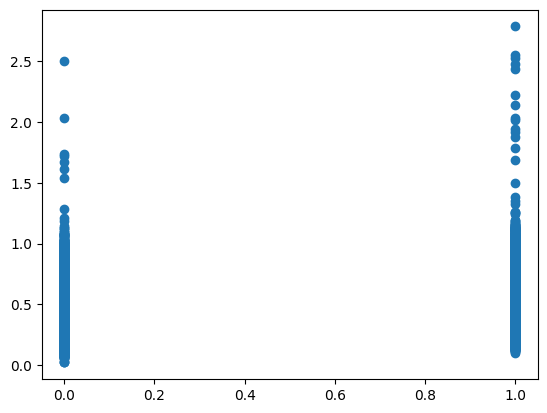

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x=y_train, y=y_lr_train_prediction)
plt.plot()

[]

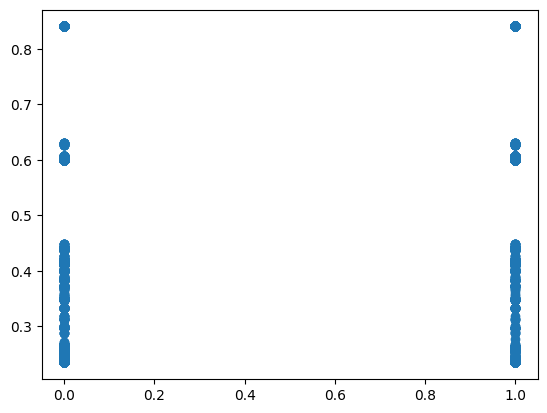

In [ ]:
plt.scatter(x=y_train, y=y_rf_train_prediction)
plt.plot()

[]

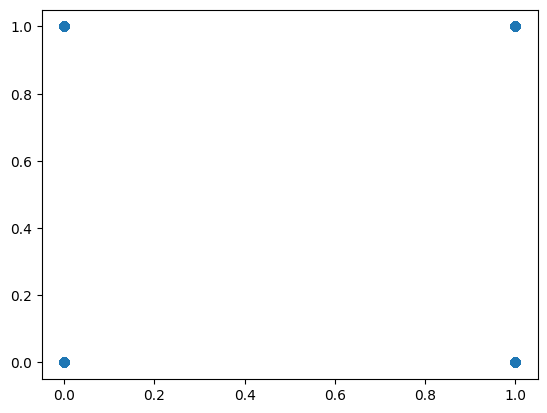

In [ ]:
plt.scatter(x=y_train, y=y_log_reg_train_prediction)
plt.plot()